<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# get matplot to show charts inline
%matplotlib inline

chrome://settings/content/cookies

NOTE: Make sure third party cookies are not blocked.

In [2]:
df = pd.read_csv('../../DATA/Employee-attrition.csv')


In [3]:
df.head(10)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
5,1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
6,1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
7,1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
8,1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE
9,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


In [4]:
df.tail()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49652,8321,12/1/2014 0:00,11/28/1994,11/24/2013,12/30/2014,20,1,Grand Forks,Customer Service,Cashier,13,F,Female,Layoff,Involuntary,2014,TERMINATED,STORES


# Accessing the main DataFrame components

In [5]:
columns = df.columns
index = df.index
data = df.values

In [6]:
columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [7]:
index

RangeIndex(start=0, stop=49653, step=1)

In [8]:
data

array([[1318, '12/31/2006 0:00', '1/3/1954', ..., 2006, 'ACTIVE',
        'HEADOFFICE'],
       [1318, '12/31/2007 0:00', '1/3/1954', ..., 2007, 'ACTIVE',
        'HEADOFFICE'],
       [1318, '12/31/2008 0:00', '1/3/1954', ..., 2008, 'ACTIVE',
        'HEADOFFICE'],
       ...,
       [8279, '12/1/2015 0:00', '7/18/1994', ..., 2015, 'TERMINATED',
        'STORES'],
       [8296, '12/1/2013 0:00', '9/2/1994', ..., 2013, 'TERMINATED',
        'STORES'],
       [8321, '12/1/2014 0:00', '11/28/1994', ..., 2014, 'TERMINATED',
        'STORES']], dtype=object)

# 1. Understanding Data Types

#### 1.A Find the shape of the dataframe

In [9]:
# A:
df.shape

(49653, 18)

#### 1.B Find the data types of the dataframe

In [10]:
# A
df.dtypes

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

#### 1.C Find the number of data types in the dataframe



```
Expected Output:
int64      5
object    13
dtype: int64
```



In [11]:
df.dtypes.value_counts()

object    13
int64      5
Name: count, dtype: int64

#### 1.D Use Info

Use info and explore the difference.

In [12]:
# A:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

# 2. Selecting Column in Data Frame

#### 2.A Check Values of the `job_title` column

In [13]:
# A:
df['job_title']

0                 CEO
1                 CEO
2                 CEO
3                 CEO
4                 CEO
             ...     
49648    Dairy Person
49649         Cashier
49650         Cashier
49651         Cashier
49652         Cashier
Name: job_title, Length: 49653, dtype: object

#### 2.B Find how many rows are in each job title



```
# Expected Output
Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
.
.
.
```



In [14]:
# A:
df['job_title'].value_counts()

job_title
Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Bakery Manager                      285
Meats Manager                       285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Labor Relations Analyst              30
Accounts Receiveable Clerk           30
Trainer                              26
Accounts Payable Clerk               25
Auditor                              20
Systems Analyst                      20
Investment Analyst                   20
Compensation Analyst                 20
Corporate Lawyer              

#### 2.C [BONUS] Write a function to count the number of rows


```
def row_count(column_name):
    number_of_rows = 0
    return number_of_rows
```



In [15]:
def row_count(column_name):
    no_of_rows = df.loc[:, column_name].count()
    return no_of_rows

In [16]:
row_count('age')

49653

#### 2.D Describe `age`

Find the count, mean, std, min, max of the column 'age'

In [17]:
# A:

In [18]:
df['age'].describe()

count    49653.000000
mean        42.077035
std         12.427257
min         19.000000
25%         31.000000
50%         42.000000
75%         53.000000
max         65.000000
Name: age, dtype: float64

In [19]:
print(f"'Age' mean: {np.mean(df['age'])}")
print(f"'Age' min: {np.min(df['age'].astype('float'))}")
print(f"'Age' max: {np.max(df['age'].astype('float'))}")

'Age' mean: 42.077034620264634
'Age' min: 19.0
'Age' max: 65.0


##### 2.E [BONUS] Describe all numeric columns of the dataframe

Find the count, mean, std, min, max of all columns of the dataframe

In [20]:
# A:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,49653.0,4859.495740,1826.571142,1318.0,3360.0,5031.0,6335.0,8336.0
age,49653.0,42.077035,12.427257,19.0,31.0,42.0,53.0,65.0
length_of_service,49653.0,10.434596,6.325286,0.0,5.0,10.0,15.0,26.0
store_name,49653.0,27.297605,13.514134,1.0,16.0,28.0,42.0,46.0
STATUS_YEAR,49653.0,2010.612612,2.845577,2006.0,2008.0,2011.0,2013.0,2015.0


# 3. Make the index meaningful by making `EmployeeID` the index

In [21]:
# A:
df.set_index('EmployeeID', inplace=True)

In [34]:
df.reset_index()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,8325,12/31/2013 0:00,12/7/1994,11/29/2013,1/1/1900,19,0,Cranbrook,Customer Service,Cashier,8,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,STORES
1,8253,12/31/2013 0:00,5/15/1994,8/12/2013,1/1/1900,19,0,North Vancouver,Customer Service,Cashier,22,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
2,8252,12/31/2013 0:00,5/10/1994,8/9/2013,1/1/1900,19,0,Victoria,Customer Service,Cashier,46,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
3,8251,12/31/2013 0:00,5/7/1994,8/7/2013,1/1/1900,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
4,8250,12/31/2013 0:00,4/26/1994,8/2/2013,1/1/1900,19,0,Burnaby,Dairy,Dairy Person,5,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,3262,8/1/2008 0:00,8/23/1943,2/28/1995,8/23/2008,65,13,Nanaimo,Meats,Meat Cutter,18,F,Female,Retirement,Voluntary,2008,TERMINATED,STORES
49649,3248,8/1/2008 0:00,8/14/1943,2/19/1995,8/14/2008,65,13,Vancouver,Dairy,Dairy Person,35,F,Female,Retirement,Voluntary,2008,TERMINATED,STORES
49650,4948,7/1/2013 0:00,7/9/1948,1/14/2000,7/9/2013,65,13,Burnaby,Produce,Produce Clerk,5,F,Female,Retirement,Voluntary,2013,TERMINATED,STORES
49651,3356,11/1/2008 0:00,11/18/1943,5/26/1995,11/18/2008,65,13,Nanaimo,Meats,Meat Cutter,18,F,Female,Retirement,Voluntary,2008,TERMINATED,STORES


In [22]:
df

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES


#### 3.A Find a specific row using the index

In [23]:
# A:

In [24]:
df.loc[8258]

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
8258,12/31/2013 0:00,5/28/1994,8/19/2013,12/30/2015,19,0,Valemount,Dairy,Dairy Person,34,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,STORES
8258,12/31/2014 0:00,5/28/1994,8/19/2013,12/30/2015,20,1,Valemount,Dairy,Dairy Person,34,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,STORES
8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES


#### 3.B Sort the dataframe using the index

In [25]:
# A:
df.sort_index(axis=0, ascending=True)

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8335,12/31/2013 0:00,12/28/1994,12/10/2013,1/1/1900,19,0,Vancouver,Dairy,Dairy Person,35,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
8335,12/31/2015 0:00,12/28/1994,12/10/2013,1/1/1900,21,2,Vancouver,Dairy,Dairy Person,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,STORES
8336,12/31/2015 0:00,12/31/1994,12/11/2013,1/1/1900,21,2,Vancouver,Dairy,Dairy Person,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,STORES


#### 3.C [BONUS] Sort the dataframe using `age`

In [26]:
# A:
df.sort_values(by='age', ascending=True, inplace=True)
df

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
8325,12/31/2013 0:00,12/7/1994,11/29/2013,1/1/1900,19,0,Cranbrook,Customer Service,Cashier,8,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,STORES
8253,12/31/2013 0:00,5/15/1994,8/12/2013,1/1/1900,19,0,North Vancouver,Customer Service,Cashier,22,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
8252,12/31/2013 0:00,5/10/1994,8/9/2013,1/1/1900,19,0,Victoria,Customer Service,Cashier,46,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
8251,12/31/2013 0:00,5/7/1994,8/7/2013,1/1/1900,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
8250,12/31/2013 0:00,4/26/1994,8/2/2013,1/1/1900,19,0,Burnaby,Dairy,Dairy Person,5,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3262,8/1/2008 0:00,8/23/1943,2/28/1995,8/23/2008,65,13,Nanaimo,Meats,Meat Cutter,18,F,Female,Retirement,Voluntary,2008,TERMINATED,STORES
3248,8/1/2008 0:00,8/14/1943,2/19/1995,8/14/2008,65,13,Vancouver,Dairy,Dairy Person,35,F,Female,Retirement,Voluntary,2008,TERMINATED,STORES
4948,7/1/2013 0:00,7/9/1948,1/14/2000,7/9/2013,65,13,Burnaby,Produce,Produce Clerk,5,F,Female,Retirement,Voluntary,2013,TERMINATED,STORES


#### 3.D [BONUS] Using `sample` select any row

In [27]:
# A:
df.sample(20)

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
3178,12/31/2006 0:00,1/7/1959,12/11/1994,1/1/1900,47,12,Victoria,Produce,Produce Clerk,46,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,STORES
1929,12/31/2013 0:00,5/9/1952,6/4/1991,1/1/1900,61,22,New Westminster,Meats,Meat Cutter,21,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,STORES
2622,12/31/2014 0:00,4/1/1956,6/25/1993,1/1/1900,58,21,New Westminster,Meats,Meat Cutter,21,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,STORES
1840,12/31/2015 0:00,11/3/1951,2/26/1991,1/1/1900,64,24,Vancouver,Meats,Meat Cutter,41,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,STORES
4451,12/31/2006 0:00,12/29/1946,7/6/1998,12/29/2011,60,8,West Vancouver,Meats,Meat Cutter,38,F,Female,Not Applicable,Not Applicable,2006,ACTIVE,STORES
2604,12/31/2011 0:00,2/27/1956,6/7/1993,1/1/1900,55,18,Victoria,Meats,Meat Cutter,46,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,STORES
7118,12/31/2014 0:00,8/27/1985,1/4/2009,1/1/1900,29,5,Vancouver,Meats,Meat Cutter,44,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,STORES
3364,12/31/2013 0:00,12/9/1959,6/7/1995,1/1/1900,54,18,Kelowna,Meats,Meat Cutter,16,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,STORES
5669,12/31/2010 0:00,1/28/1974,11/24/2002,1/1/1900,36,8,Nanaimo,Dairy,Dairy Person,18,F,Female,Not Applicable,Not Applicable,2010,ACTIVE,STORES


# 4. Query Data Frame

#### 4.A Find rows Where `job_title` is CEO

In [28]:
# A:
df.loc[df['job_title'] == 'CEO']

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE


#### 4.B Group by `age` and find how many there are of each age

In [29]:
# A:
df.groupby(by='age', as_index=True)['age'].count().reset_index(name='count')

,age,count
0,19,158
1,20,408
2,21,703
3,22,815
4,23,960
5,24,1111
6,25,1197
7,26,1210
8,27,1235
9,28,1225


# 5. Visualisation


#### 5.A Plot a histogram of `age`

Text(0.5, 1.0, 'Histogram of Age')

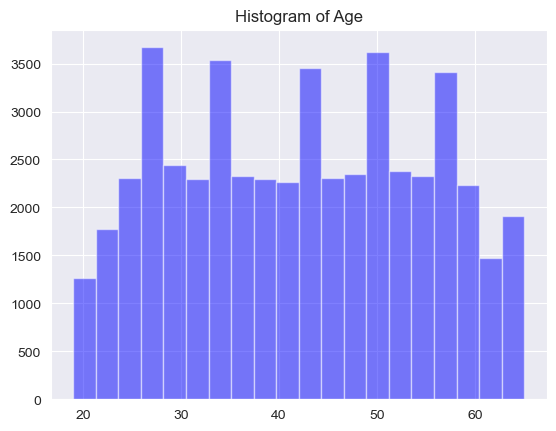

In [30]:
# A:
import seaborn as sns

sns.set_style('darkgrid')
bins_no = 20
plt.hist(x=df['age'], bins=bins_no, color='blue', alpha=0.5)

plt.title('Histogram of Age')

#### 5.B BoxPlot of `age`

Text(0.5, 1.0, 'Boxplot of Age')

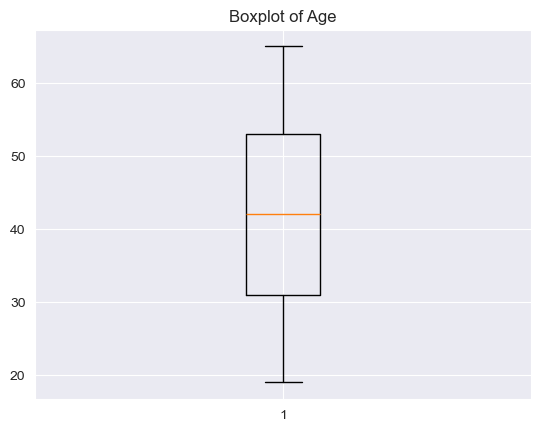

In [31]:
# A:
sns.set_style('darkgrid')
plt.boxplot(x=df['age'])

plt.title('Boxplot of Age')

#### 5.C Create a scatterplot of `age` and `length_of_service`

Text(0.5, 1.0, 'Scatter Plot of Age & Length Of Service')

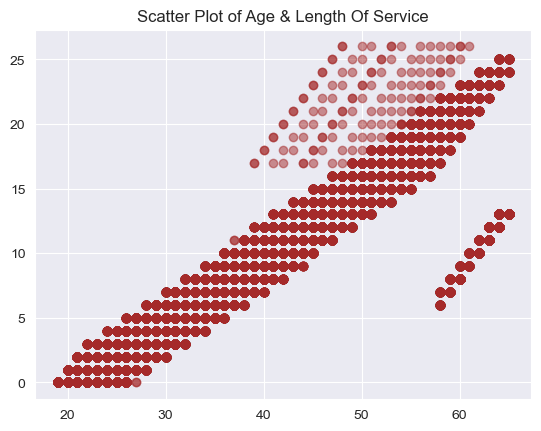

In [32]:
# A:
sns.set_style('darkgrid')
plt.scatter(x=df['age'], y=df['length_of_service'], color='brown', alpha=0.5)

plt.title('Scatter Plot of Age & Length Of Service')

#### 5.D Print a statistical summary of `age`

In [33]:
# A:
df['age'].describe()

count    49653.000000
mean        42.077035
std         12.427257
min         19.000000
25%         31.000000
50%         42.000000
75%         53.000000
max         65.000000
Name: age, dtype: float64



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



